<a href="https://colab.research.google.com/github/aneeshcheriank/approaching-any-machine-learning-problem/blob/main/Supervised_vs_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline


# to import data
# sklean built-in function 
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)

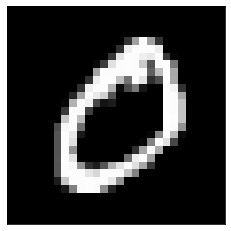

In [ ]:
# the pixel values are pandas dataframe
# type(pixel_values)

single_image = pixel_values.iloc[1].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')
plt.tick_params(
    left = False,
    bottom = False,
    labelleft = False,
    labelbottom = False
)

In [ ]:
# apply t-SNE on the data
tsne = manifold.TSNE(n_components=2, random_state=42)
trasformed_data = tsne.fit_transform(pixel_values.iloc[:3000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsne_df = pd.DataFrame(
    np.column_stack((trasformed_data, targets.iloc[:3000])),
    columns=['x', 'y', 'targets']
)

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

In [ ]:
tsne_df.head()

,x,y,targets
0,31.722771,-16.391663,5
1,10.612940,-67.804901,0
2,49.593014,38.388294,4
3,-37.814510,32.660255,1
4,22.104887,31.574816,9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


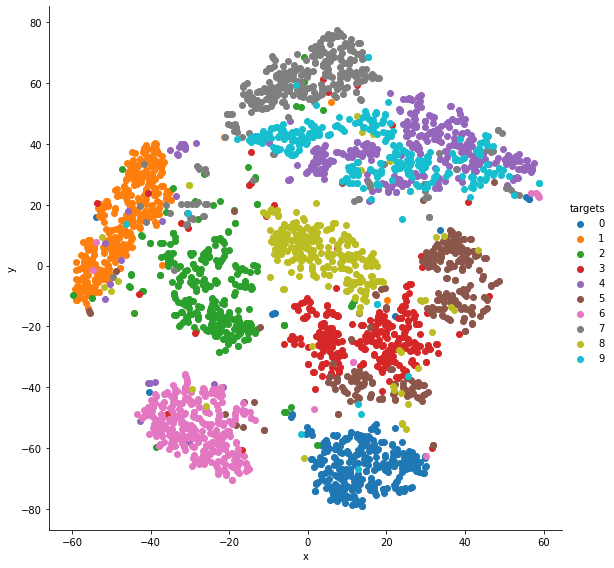

In [ ]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

## Cross Validation
1. prevents overfitting

### read wine data
1. attributes
  1. fixed acidity
  2. volatile acidity
  3. citric acid
  4. residual sugar
  5. chlorides
  6. free sulfur dioxide
  7. total sulfur dioxide
  8. density
  9. pH
  10. sulphates
  11. alcohol

In [ ]:
# export data
from google.colab import files

files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [ ]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

as the quality values contain 6 values, ie (3, 4, 5, 6, 7 and 8) we can replace the values with 0 to 5

In [ ]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df['quality'] = df['quality'].map(quality_mapping)

In [ ]:
# shuffle the data
df.sample(frac=1).reset_index(drop=True)

# training sample
df_train = df[:1000]

# testing sample
df_test = df[1000:]

# fit a decision tree 
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 3)

# choose the columns we need to train on
cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'  
]

# fit the model
clf.fit(df_train[cols], df_train['quality'])

# predict on train and test
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

# calculate accuracy on training and test data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)


print(f'train accuracy: {train_accuracy}')
print(f'test accuracy: {test_accuracy}')

train accuracy: 0.58
test accuracy: 0.5442404006677797


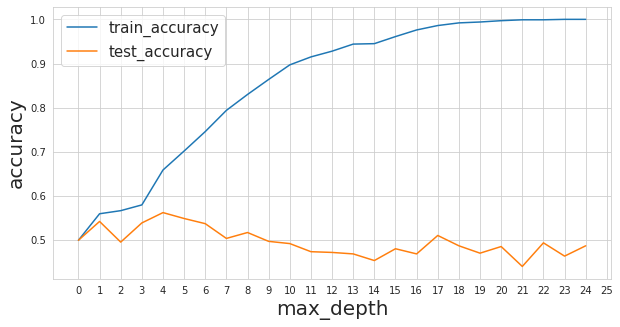

In [ ]:
# fit a decision tree 
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_accuracy = [.5]
test_accuracy = [.5]

for depth in range(1, 25):
  clf = tree.DecisionTreeClassifier(max_depth = depth)

  # choose the columns we need to train on
  cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'  
  ]

  # fit the model
  clf.fit(df_train[cols], df_train['quality'])

  # predict df_test.shapeon train and test
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])

  # calculate accuracy on training and test data
  train_accuracy.append(
      metrics.accuracy_score(df_train.quality, train_predictions)
  )
  test_accuracy.append(
      metrics.accuracy_score(df_test.quality, test_predictions)
  )

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(test_accuracy, label='test_accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 1))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

## overfitting
1. test loss increases, while train loss dereases

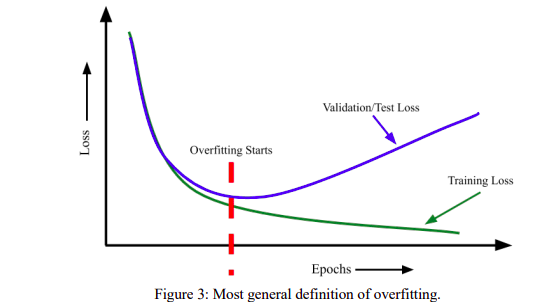

## Cross validation
1. diff type
  1. k-fold
    - devide data into k subsets
      - randomized data
      - select k equal parts
    
  2. stratified k-fold cross validation
    - skewed dataset
      - 90% one class 10% other
    - ratio of target variable is same in every fold
    
  3. hold-out based validation
    - for cases where the input data is huge
      - ~ 1 million rows
      - 10 fold insted of 5 so we have 100k samples for validation
      - will do validation on this data at each time

    - ## another use case is time series data
    - problem: to predict the sale for 2020 provided with data 2015-2019
    - consider you hold out data for 2019 and try to predict using 2015-2018
    - in the previous case the performance was subpar
    - solution: k fold cross valiation where k = N (no of samples)
    - ## Stratified K-fold for regression problems
      - need to make the target variables as categorical
      - then apply the stratfied K-fold

In [ ]:
# K-fold cross validation

import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
  df = pd.read_csv('winequality-red.csv')

  # create a column 'k-fold' and fill with -1
  df['kfold'] = -1
  # randomize the rows
  df = df.sample(frac=1).reset_index(drop=True)

  kf = model_selection.KFold(n_splits=5)

  for fold, (train_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

  df.to_csv('train_folds.csv', index=False)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.90,6,0
1,6.4,0.31,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.00,7,0
2,11.7,0.45,0.63,2.2,0.073,7.0,23.0,0.99974,3.21,0.69,10.90,6,0
3,10.8,0.47,0.43,2.1,0.171,27.0,66.0,0.99820,3.17,0.76,10.80,6,0
4,8.2,0.20,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.40,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.00,6,4
1595,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.40,5,4
1596,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.99700,3.06,0.66,13.40,6,4
1597,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5,4


In [ ]:
# Stratified K-fold cross validation

import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
  df = pd.read_csv('winequality-red.csv')

  # create a column 'k-fold' and fill with -1
  df['kfold'] = -1
  # randomize the rows
  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df['quality'].values
  kf = model_selection.StratifiedKFold(n_splits=5)

  for fold, (train_, val_) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_, 'kfold'] = fold

  df.to_csv('train_folds.csv', index=False)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6,0
1,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5,0
2,8.4,0.590,0.29,2.6,0.109,31.0,119.0,0.99801,3.15,0.50,9.1,5,0
3,7.7,0.280,0.30,2.0,0.062,18.0,34.0,0.99520,3.28,0.90,11.3,7,0
4,7.8,0.640,0.10,6.0,0.115,5.0,11.0,0.99840,3.37,0.69,10.1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,4
1595,9.0,0.460,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6,4
1596,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4,4
1597,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5,4


Text(0, 0.5, 'count')

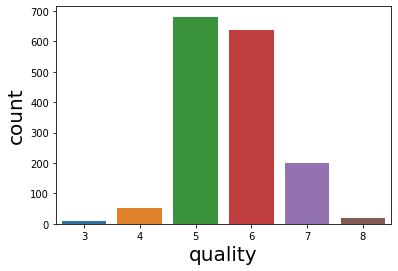

In [ ]:
import seaborn as sns

b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

- Cross validation is the first and foremost step in the machine learning process
- if you want to do feature engineering before doing the feature engineeering you need to split your data


- ## Cross validation depends on data
- you may have to take call on your data

- eg: let the problem in your hand is to build a model to find melenoma in the given images
- binary classifcation
- you may have multiple images of same patient in the training dataset
- to build a good cross valiation we have to employee statified cross valiation here
- at the same time you have to ensure that the patient appear in the training set should not appear in the test/valiation set
- scikit learn offers a cross validation called `GroupKFold`. The patient can be considered as a group. However, there is no way  to combine the `GroupKFold` with `StratifiedKFold` in scikitlearn